In [2]:
!pip install gdown

import gdown
import shutil

# Destination directory where the user will download the data https://drive.google.com/file/d/1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB/view?usp=sharing
destination_path = '/content'

# Direct download link for the ZIP file
folder_id ='1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB'
zip_file_url = f'https://drive.google.com/uc?id={folder_id}'


# Download the ZIP file
zip_file_path = destination_path + '/DATA.zip'
gdown.download(zip_file_url, zip_file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Lkijp_uhdROHhc6MBQrRDF2Xmee8OIEB
To: /content/DATA.zip
100%|██████████| 200M/200M [00:04<00:00, 41.3MB/s]


'/content/DATA.zip'

In [3]:
# Extract the downloaded ZIP file
shutil.unpack_archive(zip_file_path, destination_path)

print("Data has been downloaded and extracted to:", destination_path)

Data has been downloaded and extracted to: /content


In [4]:
import os

# Replace 'folder1_path' and 'folder2_path' with the actual paths of your two folders
folder1_path = '/content/Not_Resume'
folder2_path = '/content/Resume'

# Create a new folder named 'DATA'
data_folder_path = '/content/DATA'
os.makedirs(data_folder_path, exist_ok=True)

# Move the existing folders into the 'DATA' folder
shutil.move(folder1_path, data_folder_path)
shutil.move(folder2_path, data_folder_path)


'/content/DATA/Resume'

In [5]:
import os

# Set the path to the parent folder where Test_DATA will be created
parent_folder = '/content'

# Create Test_DATA folder
test_data_folder = os.path.join(parent_folder, 'Test_DATA')
os.makedirs(test_data_folder, exist_ok=True)

# Create Resume folder inside Test_DATA
resume_folder = os.path.join(test_data_folder, 'Resume')
os.makedirs(resume_folder, exist_ok=True)

# Create Not_Resume folder inside Test_DATA
not_resume_folder = os.path.join(test_data_folder, 'Not_Resume')
os.makedirs(not_resume_folder, exist_ok=True)

print(f"Folder structure created: {parent_folder}/Test_DATA/Resume and {parent_folder}/Test_DATA/Not_Resume")

Folder structure created: /content/Test_DATA/Resume and /content/Test_DATA/Not_Resume


In [6]:
import shutil
import random

def move_images(source_folder, destination_folder, category, num_images):
    files = random.sample(os.listdir(os.path.join(source_folder, category)), num_images)
    destination_path = os.path.join(destination_folder, category)

    # Create destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    for file in files:
        source_path = os.path.join(source_folder, category, file)
        shutil.move(source_path, os.path.join(destination_path, file))

# Set your source and destination folders
source_folder = '/content/DATA'
destination_folder = '/content/Test_DATA'
num_images_to_move = 60

# Move images from Resume folder
move_images(source_folder, destination_folder, 'Resume', num_images_to_move)

# Move images from Not_Resume folder
move_images(source_folder, destination_folder, 'Not_Resume', num_images_to_move)

# Data Processing

In [7]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code.
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
import tensorflow as tf

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Specify the path to your data
data_path = '/content/DATA'

# Create an ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Create separate generators for training, validation, and test
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary',
    subset='training'  # Use subset parameter for the training set
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary',
    subset='validation'  # Use subset parameter for the validation set
)


Found 437 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [29]:
# Specify the path to your data
test_data_path = '/content/Test_DATA'
# Create an ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)
# Create separate generators for training, validation, and test
test_generator = datagen.flow_from_directory(
    test_data_path,
    target_size=(640, 640),
    batch_size=4,
    class_mode='binary' # Use subset parameter for the test set
)



Found 120 images belonging to 2 classes.


# model

In [ ]:
#Apply CNN
# ### Build the model

#############################################################
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (640, 640, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(1, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='binary_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())

In [32]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

INPUT_SHAPE = (640, 640, 3)

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [26]:
from keras.callbacks import ModelCheckpoint

# Fit the model using the generators with ModelCheckpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size # add the ModelCheckpoint callback to the list of callbacks
)


Epoch 1/100
109/109 [==============================] - 35s 169ms/step - loss: 0.4931 - accuracy: 0.7945 - val_loss: 0.2787 - val_accuracy: 0.9375
Epoch 2/100
109/109 [==============================] - 15s 133ms/step - loss: 0.2792 - accuracy: 0.8845 - val_loss: 0.0686 - val_accuracy: 1.0000
Epoch 3/100
109/109 [==============================] - 14s 130ms/step - loss: 0.4001 - accuracy: 0.8222 - val_loss: 0.0758 - val_accuracy: 0.9792
Epoch 4/100
109/109 [==============================] - 14s 129ms/step - loss: 0.2957 - accuracy: 0.8776 - val_loss: 0.0655 - val_accuracy: 1.0000
Epoch 5/100
109/109 [==============================] - 14s 127ms/step - loss: 0.2961 - accuracy: 0.8845 - val_loss: 0.0705 - val_accuracy: 0.9583
Epoch 6/100
109/109 [==============================] - 14s 129ms/step - loss: 0.2590 - accuracy: 0.9007 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 7/100
109/109 [==============================] - 15s 137ms/step - loss: 0.2465 - accuracy: 0.9030 - val_loss: 0.0463 -

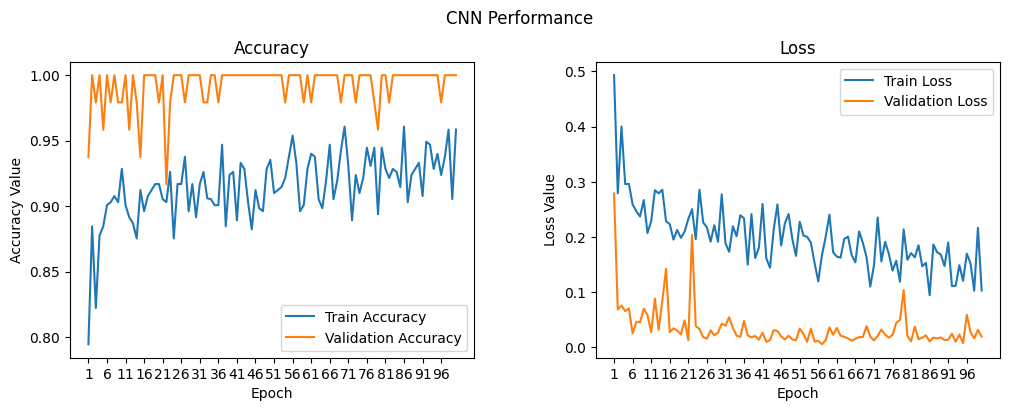

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#Save the model
model.save('model.h5')

In [41]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/model.h5')  # Replace with the path to your saved model


In [42]:
class_names = ["Not_Resume", "Resume"]


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to your test data
test_data_path = '/content/Test_DATA'  # Replace with the path to your test data folder

# Create an ImageDataGenerator for testing (use the same preprocessing as for training)
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add more preprocessing options if needed

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(640, 640),  # Adjust the target size based on your model's input size
    batch_size=4,
    class_mode='binary',  # Since you have a binary classification problem
    shuffle=False  # Do not shuffle for evaluation
)


Found 120 images belonging to 2 classes.


In [44]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


30/30 [==============================] - 191s 6s/step - loss: 0.0059 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0059


In [45]:
# Get predictions for the test data
y_pred_probs = model.predict(test_generator)

# Convert probabilities to class labels using a threshold (e.g., 0.5)
y_pred_classes = (y_pred_probs >= 0.5).astype(int)


30/30 [==============================] - 184s 6s/step


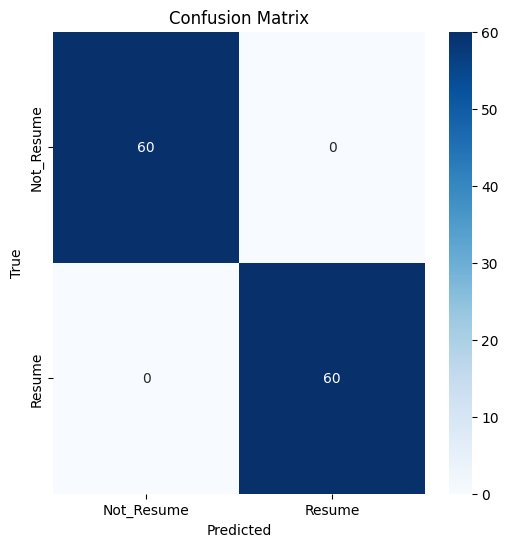

              precision    recall  f1-score   support

  Not_Resume       1.00      1.00      1.00        60
      Resume       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels from the generator
y_true = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


# hyperparameter tuning